<a href="https://colab.research.google.com/github/Krzesimir13/Data-Science/blob/main/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'2.0.2'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [3]:
google_raw = fetch_financial_data('GOOG')
google = google_raw.copy()
google

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-28,270.2000,271.3800,267.1700,268.4300,20101160
2025-10-27,265.3600,270.8000,264.9400,269.9300,22987660
2025-10-24,257.3000,262.5100,256.1000,260.5100,18405966
2025-10-23,253.7000,255.8600,252.7683,253.7300,13241319
2025-10-22,255.0100,257.1800,250.4510,252.5300,19650244
...,...,...,...,...,...
2020-11-05,89.0500,89.6820,87.5255,88.1685,41316240
2020-11-04,85.5140,88.5683,85.3015,87.4565,71418540
2020-11-03,81.5890,83.0850,80.8310,82.5105,33233060


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2025-10-28 to 2020-10-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1254 non-null   float64
 1   High    1254 non-null   float64
 2   Low     1254 non-null   float64
 3   Close   1254 non-null   float64
 4   Volume  1254 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [5]:
google.describe()

,Open,High,Low,Close,Volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,139.911235,141.536665,138.449593,140.022545,2.483330e+07
std,36.085392,36.411585,35.759930,36.139203,1.073304e+07
min,81.408000,83.038500,80.223000,81.050500,6.809823e+06
25%,112.953250,114.217000,111.621000,112.748250,1.783254e+07
50%,136.507000,137.929000,135.220000,136.675000,2.243752e+07
75%,164.810000,166.700000,163.170000,164.612500,2.866614e+07
max,270.200000,271.380000,267.170000,269.930000,9.779857e+07


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [6]:
pd.set_option('display.precision', 2)

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [7]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1254.00,1254.00,1254.00,1254.00,1254.00
mean,139.91,141.54,138.45,140.02,24833298.12
std,36.09,36.41,35.76,36.14,10733040.98
min,81.41,83.04,80.22,81.05,6809823.00
25%,112.95,114.22,111.62,112.75,17832545.00
50%,136.51,137.93,135.22,136.68,22437519.00
75%,164.81,166.70,163.17,164.61,28666135.00
max,270.20,271.38,267.17,269.93,97798573.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

<Axes: xlabel='Date', ylabel='Close'>

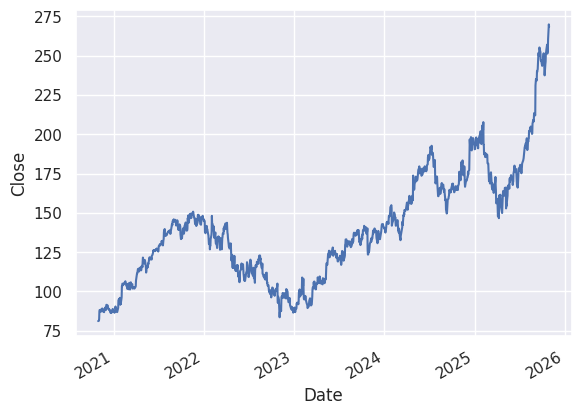

In [8]:
google['Close'].plot(ylabel='Close')

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [9]:
google.reset_index(inplace=True)
google.head()

,Date,Open,High,Low,Close,Volume
0,2025-10-28,270.20,271.38,267.17,268.43,20101160
1,2025-10-27,265.36,270.80,264.94,269.93,22987660
2,2025-10-24,257.30,262.51,256.10,260.51,18405966
3,2025-10-23,253.70,255.86,252.77,253.73,13241319
4,2025-10-22,255.01,257.18,250.45,252.53,19650244


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [10]:
google['Month'] = google.Date.dt.month
google['Year'] = google.Date.dt.year
google.Month.value_counts()

,count
Month,
8,111
3,110
10,108
5,106
12,106
7,105
9,103
6,103
4,103


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [11]:
close_year = google.groupby(google.Date.dt.year).Close.mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

<Axes: xlabel='Date', ylabel='Close Mean'>

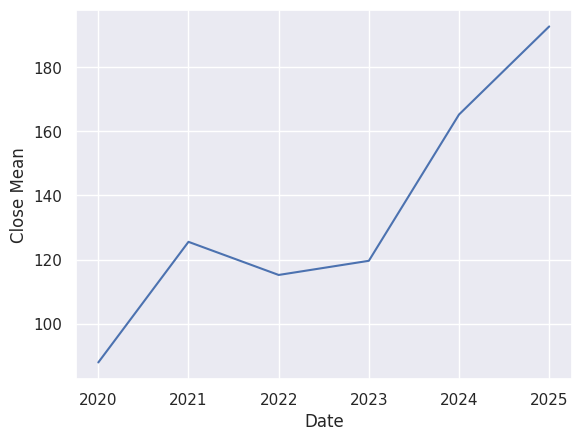

In [12]:
close_year.plot(ylabel='Close Mean')

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [13]:
close_month = google.groupby(google.Date.dt.month).Close.mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

<Axes: xlabel='Date', ylabel='Close Mean'>

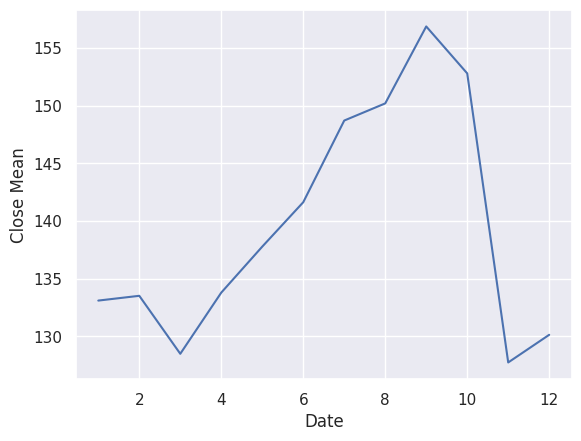

In [ ]:
close_month.plot(ylabel='Close Mean')

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [15]:
google.groupby(['Year', 'Month']).Close.mean()

Year  Month
2020  10       81.05
      11       87.42
      12       88.61
2021  1        90.42
      2       103.42
               ...  
2025  6       173.68
      7       185.91
      8       202.88
      9       242.95
      10      251.20
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [19]:
google['Close'].idxmax()

1

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [20]:
google.iloc[google['Close'].idxmax()].Date

Timestamp('2025-10-27 00:00:00')

### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [23]:
google
google.loc[:, ['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2025-10-28,270.20,268.43,20101160
1,2025-10-27,265.36,269.93,22987660
2,2025-10-24,257.30,260.51,18405966
3,2025-10-23,253.70,253.73,13241319
4,2025-10-22,255.01,252.53,19650244
...,...,...,...,...
1249,2020-11-05,89.05,88.17,41316240
1250,2020-11-04,85.51,87.46,71418540
1251,2020-11-03,81.59,82.51,33233060
1252,2020-11-02,81.41,81.30,50708920


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [24]:
google = google.set_index('Date')
google.head()

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2025-10-28,270.20,271.38,267.17,268.43,20101160,10,2025
2025-10-27,265.36,270.80,264.94,269.93,22987660,10,2025
2025-10-24,257.30,262.51,256.10,260.51,18405966,10,2025
2025-10-23,253.70,255.86,252.77,253.73,13241319,10,2025
2025-10-22,255.01,257.18,250.45,252.53,19650244,10,2025


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [26]:
google.drop(columns=['Year', 'Month'], inplace=True)
google.head()

,Otwarcie,Najwyższy,Najniższy,Zamknięcie,Wolumen
Data,,,,,
2025-10-28,270.20,271.38,267.17,268.43,20101160
2025-10-27,265.36,270.80,264.94,269.93,22987660
2025-10-24,257.30,262.51,256.10,260.51,18405966
2025-10-23,253.70,255.86,252.77,253.73,13241319
2025-10-22,255.01,257.18,250.45,252.53,19650244


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [25]:
google = google.rename({'Open' : 'Otwarcie', 'High' : 'Najwyższy', 'Low' : 'Najniższy',
               'Close' : 'Zamknięcie', 'Volume' : 'Wolumen'},
              axis=1)
google = google.rename_axis('Data')

google.head()

,Otwarcie,Najwyższy,Najniższy,Zamknięcie,Wolumen,Month,Year
Data,,,,,,,
2025-10-28,270.20,271.38,267.17,268.43,20101160,10,2025
2025-10-27,265.36,270.80,264.94,269.93,22987660,10,2025
2025-10-24,257.30,262.51,256.10,260.51,18405966,10,2025
2025-10-23,253.70,255.86,252.77,253.73,13241319,10,2025
2025-10-22,255.01,257.18,250.45,252.53,19650244,10,2025
